In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("company_financials.csv")
df.head()

,date,day_of_week,sales,direct_costs,overheads
0,2024-02-05,Monday,1500,800,300
1,2024-02-06,Tuesday,1200,700,280
2,2024-02-07,Wednesday,1100,350,320
3,2024-02-08,Thursday,1300,1050,350
4,2024-02-09,Friday,2000,1200,380


In [3]:
# Creating a copy of DataFrame
df_copy = df.copy()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          19 non-null     object
 1   day_of_week   19 non-null     object
 2   sales         19 non-null     int64 
 3   direct_costs  19 non-null     int64 
 4   overheads     19 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 888.0+ bytes



#### 1. Compare the sales of the first seven days (week one) to the sales of the next seven days (week two). Use a bar graph to visualize the comparison.

In [4]:
# Converting the date column to datetime object
df_copy['date'] = pd.to_datetime(df_copy['date'])

In [5]:
# Adding a week column to the DataFrame
df_copy['number_week'] = df_copy['date'].dt.isocalendar().week
df_copy

,date,day_of_week,sales,direct_costs,overheads,number_week
0,2024-02-05,Monday,1500,800,300,6
1,2024-02-06,Tuesday,1200,700,280,6
2,2024-02-07,Wednesday,1100,350,320,6
3,2024-02-08,Thursday,1300,1050,350,6
4,2024-02-09,Friday,2000,1200,380,6
5,2024-02-10,Saturday,1200,900,300,6
6,2024-02-11,Sunday,1200,600,250,6
7,2024-02-12,Monday,1400,850,310,7
8,2024-02-13,Tuesday,1300,750,290,7
9,2024-02-14,Wednesday,1900,1000,330,7


In [6]:
# Calculating weekly sales
week_sales_1 = df_copy[df_copy["number_week"] == 6]["sales"].sum()
week_sales_2 = df_copy[df_copy["number_week"] == 7]["sales"].sum()

print(f"Week 1 sales: ${week_sales_1}")
print(f"Week 2 sales: ${week_sales_2}")

Week 1 sales: $9500
Week 2 sales: $12700


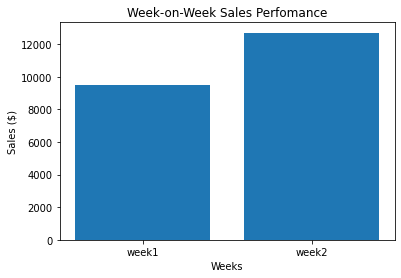

In [7]:
plt.bar(["week1", "week2"],  [week_sales_1, week_sales_2])
plt.xlabel('Weeks')
plt.ylabel('Sales ($)')
plt.title("Week-on-Week Sales Perfomance")
plt.show()


#### 2. What percentage of total costs do direct costs represent on average? What is the mean cost variation change between the minimum cost and the maximum cost as a percentage of total costs?

In [8]:
# Calculating the total costs
total_costs = df_copy["direct_costs"] + df_copy["overheads"]
# Calculating the percentage of direct costs to total costs
total_cost_pct = ((df_copy["direct_costs"] / total_costs) * 100).mean()

print(f"The percentage of directs cost to total costs {total_cost_pct:.2f}%")

The percentage of directs cost to total costs 73.12%


In [9]:
# Calculating cost variation
cost_variation = (total_costs.max() - total_costs.min())/total_costs.mean() * 100
print(f"The mean cost variation:{cost_variation:.2f}%")

The mean cost variation:82.92%


#### 3. What is the difference between profit values for Fridays and Mondays? Visualize the difference using the bar chart. Visualize the daily profitability trend over time (whole period) using a line plot (use the date column).

The difference in profit between Fridays and Mondays is $1250


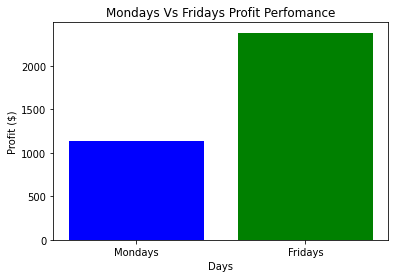

In [10]:
# Adding the profit column
df_copy["profit"] = df_copy["sales"] - df_copy["direct_costs"] - df_copy["overheads"]

# Calculating profit for Mondays
monday_profit = df_copy[df_copy["day_of_week"]=="Monday"]["profit"].sum()
# Calculating profit for Fridays
friday_profit = df_copy[df_copy["day_of_week"]=="Friday"]["profit"].sum()

difference_profit = friday_profit - monday_profit
print(f"The difference in profit between Fridays and Mondays is ${difference_profit}")

# Plotting the data
plt.bar(["Mondays", "Fridays"],  [monday_profit, friday_profit],
       color=['blue', 'green'])
plt.xlabel('Days')
plt.ylabel('Profit ($)')
plt.title("Mondays Vs Fridays Profit Perfomance")
plt.show()

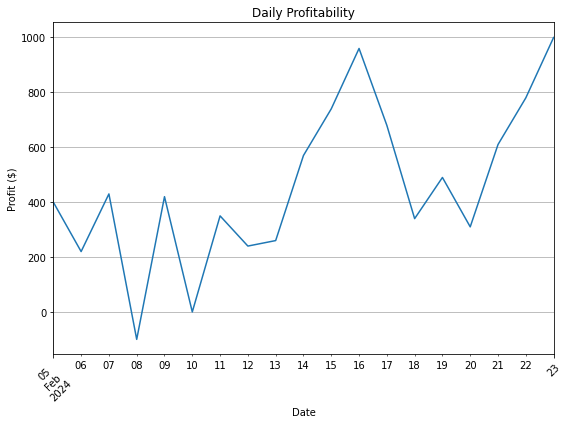

In [11]:
# Visualizing daily profitability
df_copy.set_index("date")["profit"].plot(figsize = (8, 6))
plt.title('Daily Profitability')
plt.xlabel('Date')
plt.ylabel('Profit ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
plt.show()

#### 4. What are the correlations between sales, direct costs, and overheads? Use a heatmap to visualize the correlations.

In [12]:
correlation_matrix = df_copy[['sales', 'direct_costs', 'overheads']].corr()
correlation_matrix

,sales,direct_costs,overheads
sales,1.000000,0.858343,0.836533
direct_costs,0.858343,1.000000,0.822134
overheads,0.836533,0.822134,1.000000


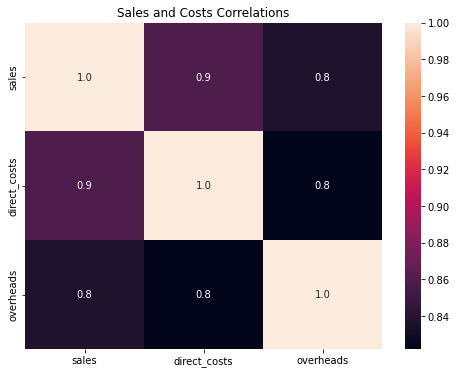

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True,
           fmt=".1f")
plt.title("Sales and Costs Correlations")
plt.show()